In [ ]:
# pip install ollama
import ollama
import cv2
import json
import matplotlib.pyplot as plt

### Bunch of hats

In [ ]:
# response 1
# Step 1: Ask Llama 3.2 Vision to locate the object
response1 = ollama.chat(
    model="llama3.2-vision",
    messages=[{
        "role": "user",
        "content": "Locate the red hat in this image and return only its bounding box in JSON format of {x: , y: , width: , height: } with un-normalised pixel values.",
        "images": ["red_hat.jpg"]  # Replace with your actual image path
    }]
)

print(response1)

model='llama3.2-vision' created_at='2025-02-24T07:52:45.9678701Z' done=True done_reason='stop' total_duration=321517595800 load_duration=8881783100 prompt_eval_count=50 prompt_eval_duration=284716000000 eval_count=63 eval_duration=27471000000 message=Message(role='assistant', content='The red hat is located at the top middle of the image, positioned between a white hat and a yellow hat. The bounding box for the red hat is as follows:\n\n{ "x": 266, \n"y": 90, \n"width": 182, \n"height": 173 }', images=None, tool_calls=None)


Image saved as output1.jpg


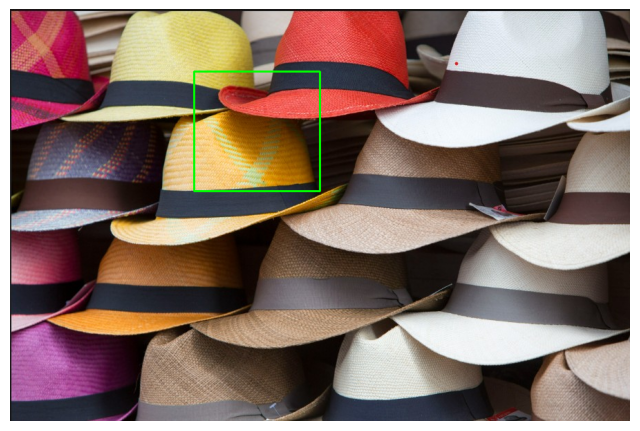

In [53]:
#response 1
try:
    bbox_json_start = response1["message"]["content"].find("{")
    bbox_json_end = response1["message"]["content"].rfind("}") + 1
    bbox_string = response1["message"]["content"][bbox_json_start:bbox_json_end]
    bbox = json.loads(bbox_string)  # Convert string to JSON
except (json.JSONDecodeError, ValueError) as e:
    print("Error parsing JSON:", e)
    bbox = None  # Handle error gracefully

# Step 3: Function to draw bounding box and display it in Jupyter Notebook
def draw_and_display_bounding_box(image_path, coordinates, output_path="output1.jpg"):
    if not coordinates:
        print("No bounding box detected. Exiting...")
        return

    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

    # Extract coordinates
    x, y, w, h = coordinates["x"], coordinates["y"], coordinates["width"], coordinates["height"]

#     # Draw bounding box (Green color, thickness = 2)
#     height, width, _ = image.shape

#     # Convert normalized bbox to pixel values
#     x = int(coordinates["x"] * width)
#     y = int(coordinates["y"] * height)
#     w = int(coordinates["width"] * width)
#     h = int(coordinates["height"] * height)
    
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Save the output image
    cv2.imwrite(output_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    print(f"Image saved as {output_path}")

    # Display image in Jupyter Notebook
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis("off")  # Hide axis for better visualization
    plt.show()

# Step 4: Call function to process the image
draw_and_display_bounding_box("red_hat.jpg", bbox)

### Single red hat

In [ ]:
#response 2
# Step 1: Ask Llama 3.2 Vision to locate the object
response2 = ollama.chat(
    model="llama3.2-vision",
    messages=[{
        "role": "user",
        "content": "Locate the red hat in this image and return only its bounding box in JSON format of {x: , y: , width: , height: } with un-normalised pixel values..",
        "images": ["only_red.jpg"]  # Replace with your actual image path
    }]
)

print(response2)

model='llama3.2-vision' created_at='2025-02-24T07:04:08.8160966Z' done=True done_reason='stop' total_duration=14068989000 load_duration=24039300 prompt_eval_count=50 prompt_eval_duration=254000000 eval_count=50 eval_duration=13690000000 message=Message(role='assistant', content='The red hat is located at the center of the image. Here is the bounding box of the red hat in JSON format:\n\n{"x": 0, "y": 0, "width": 400, "height": 300}', images=None, tool_calls=None)


Image saved as output2.jpg


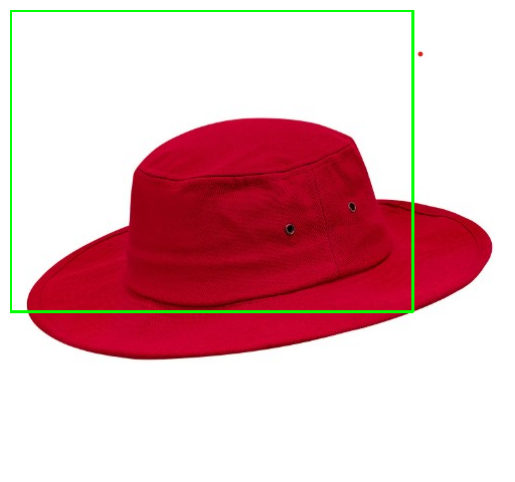

In [28]:
#response 2
try:
    bbox_json_start = response2["message"]["content"].find("{")
    bbox_json_end = response2["message"]["content"].rfind("}") + 1
    bbox_string = response2["message"]["content"][bbox_json_start:bbox_json_end]
    bbox = json.loads(bbox_string)  # Convert string to JSON
except (json.JSONDecodeError, ValueError) as e:
    print("Error parsing JSON:", e)
    bbox = None  # Handle error gracefully

# Step 3: Function to draw bounding box and display it in Jupyter Notebook
def draw_and_display_bounding_box(image_path, coordinates, output_path="output2.jpg"):
    if not coordinates:
        print("No bounding box detected. Exiting...")
        return

    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

    # Extract coordinates
    x, y, w, h = coordinates["x"], coordinates["y"], coordinates["width"], coordinates["height"]

    # Draw bounding box (Green color, thickness = 2)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Save the output image
    cv2.imwrite(output_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    print(f"Image saved as {output_path}")

    # Display image in Jupyter Notebook
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis("off")  # Hide axis for better visualization
    plt.show()

# Step 4: Call function to process the image
draw_and_display_bounding_box("only_red.jpg", bbox)

In [ ]:
# # Install required libraries if not already installed
# # !pip install ollama opencv-python matplotlib

# # Step 2: Extract bounding box coordinates from Llama's response
# bbox = json.loads(response2["message"]["content"])

# # Step 3: Function to draw and display bounding box in Jupyter Notebook
# def draw_and_display_bounding_box(image_path, coordinates, output_path="output.jpg"):
#     # Load the image
#     image = cv2.imread(image_path)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

#     # Extract coordinates
#     x, y, w, h = coordinates["x"], coordinates["y"], coordinates["width"], coordinates["height"]

#     # Draw bounding box (Green color, thickness = 2)
#     cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

#     # Save the output image
#     cv2.imwrite(output_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
#     print(f"Image saved as {output_path}")

#     # Display image in Jupyter Notebook
#     plt.figure(figsize=(8, 6))
#     plt.imshow(image)
#     plt.axis("off")  # Hide axis for better visualization
#     plt.show()

# # Step 4: Call function to process the image
# draw_and_display_bounding_box("only_red.jpg", bbox)


### Satellite image

In [ ]:
# import ollama

response = ollama.chat(
    model='llama3.2-vision',
    messages=[{
        'role': 'user',
        'content': 'What is in this image?',
        'images': ['image.jpg']
    }]
)

print(response)

### Blue t-shirt

In [29]:
response3 = ollama.chat(
    model="llama3.2-vision",
    messages=[{
        "role": "user",
        "content": "Locate the person wearing blue t-shirt in this image and return only its bounding box in JSON format of {x: , y: , width: , height: } with un-normalised pixel values..",
        "images": ["blue_shirt.jpg"]  # Replace with your actual image path
    }]
)

print(response3)

model='llama3.2-vision' created_at='2025-02-24T07:05:40.7478581Z' done=True done_reason='stop' total_duration=35639883600 load_duration=29867100 prompt_eval_count=53 prompt_eval_duration=10035000000 eval_count=84 eval_duration=25213000000 message=Message(role='assistant', content='The person wearing a blue t-shirt is located on the left side of the image. The bounding box for this person is:\n\n{ "x": 150, "y": 343, "width": 230, "height": 455 }\n\nThis indicates that the person\'s position is approximately at pixel coordinates (150, 343), with a width of 230 pixels and a height of 455 pixels.', images=None, tool_calls=None)


Image saved as output3.jpg


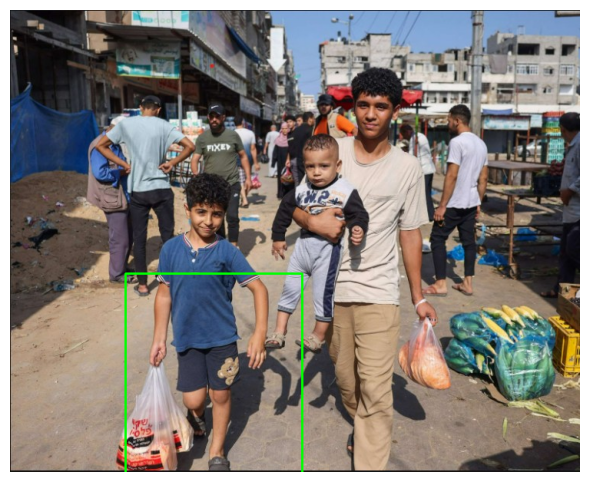

In [31]:
try:
    bbox_json_start = response3["message"]["content"].find("{")
    bbox_json_end = response3["message"]["content"].rfind("}") + 1
    bbox_string = response3["message"]["content"][bbox_json_start:bbox_json_end]
    bbox = json.loads(bbox_string)  # Convert to JSON
except (json.JSONDecodeError, ValueError) as e:
    print("Error parsing JSON:", e)
    bbox = None  # Handle error gracefully

# Step 3: Function to draw bounding box and display image
def draw_and_display_bounding_box(image_path, coordinates, output_path="output3.jpg"):
    if not coordinates:
        print("No bounding box detected. Exiting...")
        return

    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Extract coordinates
    x, y, w, h = coordinates["x"], coordinates["y"], coordinates["width"], coordinates["height"]

    # Draw bounding box (Fixed: Ensure the box is closed)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Save the output image
    cv2.imwrite(output_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    print(f"Image saved as {output_path}")

    # Display image in Jupyter Notebook
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis("off")  # Hide axis for better visualization
    plt.show()

# Step 4: Run function
draw_and_display_bounding_box("blue_shirt.jpg", bbox)


### Paddington

In [51]:
response4 = ollama.chat(
    model="llama3.2-vision",
    messages=[{
        "role": "user",
        "content": "Locate the hat in this image and return only its bounding box in JSON format of {x: , y: , width: , height: } without normalising pixel values..",
        "images": ["paddington.jpg"]  # Replace with your actual image path
    }]
)

print(response4)

model='llama3.2-vision' created_at='2025-02-24T07:40:22.3670464Z' done=True done_reason='stop' total_duration=69407022900 load_duration=35092200 prompt_eval_count=48 prompt_eval_duration=4131000000 eval_count=199 eval_duration=64956000000 message=Message(role='assistant', content="The provided image is a digital illustration of Paddington Bear, a beloved character from children's literature. The bear wears a blue coat with a large pocket on the front and a red hat with a yellow band around it.\n\nTo extract the bounding box of the hat in this image, we can use the following steps:\n\n1. **Identify the Hat**: Locate the red hat with a yellow band on Paddington Bear's head.\n2. **Define Coordinates**: Measure from the top-left corner of the image to find the coordinates where the hat begins (x: 0, y: 0).\n3. **Determine Size**: Measure the width and height of the hat to define its dimensions within the image.\n\nGiven these steps, the bounding box for the red hat in this image is:\n\n{ x

In [49]:
try:
    bbox_json_start = response4["message"]["content"].find("{")
    bbox_json_end = response4["message"]["content"].rfind("}") + 1
    bbox_string = response4["message"]["content"][bbox_json_start:bbox_json_end]
    bbox = json.loads(bbox_string)  # Convert to JSON
except (json.JSONDecodeError, ValueError) as e:
    print("Error parsing JSON:", e)
    bbox = None  # Handle error gracefully

# Step 3: Function to draw bounding box and display image
def draw_and_display_bounding_box(image_path, coordinates, output_path="output4.jpg"):
    if not coordinates:
        print("No bounding box detected. Exiting...")
        return

    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Extract coordinates
    x, y, w, h = coordinates["x"], coordinates["y"], coordinates["width"], coordinates["height"]

        # Draw bounding box (Green color, thickness = 2)
    height, width, _ = image.shape

    # Convert normalized bbox to pixel values
    x = int(coordinates["x"] * width)
    y = int(coordinates["y"] * height)
    w = int(coordinates["width"] * width)
    h = int(coordinates["height"] * height)
    # Draw bounding box (Fixed: Ensure the box is closed)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Save the output image
    cv2.imwrite(output_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    print(f"Image saved as {output_path}")

    # Display image in Jupyter Notebook
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis("off")  # Hide axis for better visualization
    plt.show()

# Step 4: Run function
draw_and_display_bounding_box("paddington.jpg", bbox)


Error parsing JSON: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
No bounding box detected. Exiting...
